In [1]:
import nltk

In [ ]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [2]:
import pandas as pd,numpy as np
import matplotlib.pyplot as plt

In [1]:
reviews = pd.read_csv("K8 Reviews v0.2.csv")

NameError: name 'pd' is not defined

In [5]:
reviews.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


This dataset is scrapped from amazon about Lenevo K8 mobile phones
While the users give the reviews, they also give the ratings
Ratings 1,2,3 -> negitive sentiment has a value 0 in the sentiment column
Ratings 4,5 -> positive sentiment has a value 1 in the sentiment column

In [6]:
reviews.sentiment.value_counts()

0    7712
1    6963
Name: sentiment, dtype: int64

In [7]:
reviews.shape

(14675, 2)

In [10]:
from wordcloud import WordCloud

In [11]:
reviews_combined = " ".join(reviews.review.values)

In [12]:
#Total words in reviews
len(reviews_combined)

1674772

In [13]:
reviews_combined[:200]

'Good but need updates and improvements Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.'

In [14]:
word_cloud = WordCloud().generate_from_text(reviews_combined)

In [24]:
?WordCloud

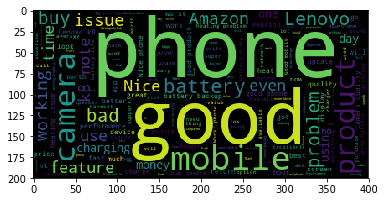

In [15]:
plt.figure()
plt.imshow(word_cloud)
plt.show()

In [16]:
word_cloud = WordCloud(width=800,height=800,background_color='white',max_words=150).\
generate_from_text(reviews_combined)

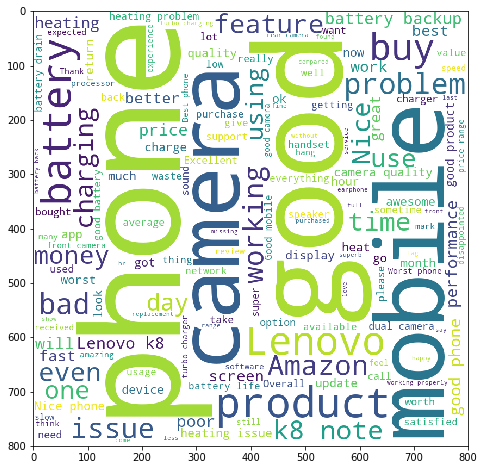

In [17]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

In [18]:
all_terms = []
fdist = {}
all_terms = reviews_combined.split(" ")
for word in all_terms:
    fdist[word] = fdist.get(word,0) + 1

In [19]:
freq = {"words":list(fdist.keys()),"freq":list(fdist.values())}
df_dist = pd.DataFrame(freq)

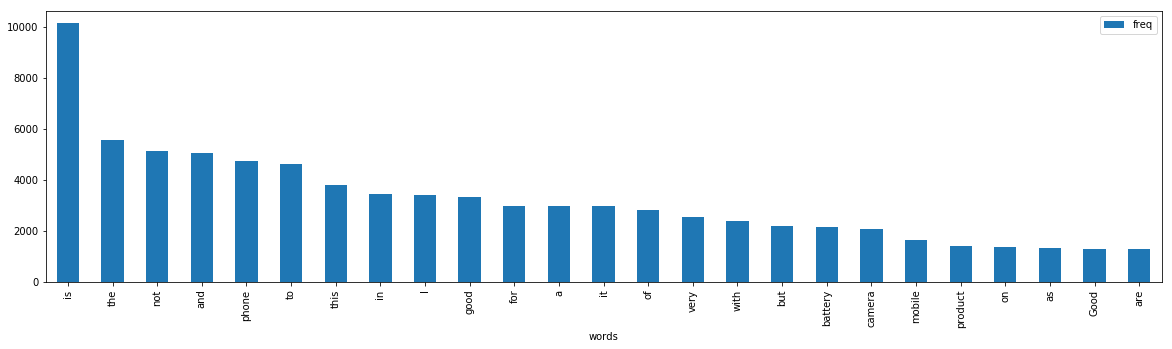

In [20]:
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5)) 

Problems with the above visuals
    1.case is non uniform
    2. punctuations and stop words
    3. words with different tense forms like charged, charging, charges has its root form in charge

In [ ]:
#1. case normalization and tokenizing

In [21]:
reviews.review[:10]

0               Good but need updates and improvements
1    Worst mobile i have bought ever, Battery is dr...
2    when I will get my 10% cash back.... its alrea...
3                                                 Good
4    The worst phone everThey have changed the last...
5    Only I'm telling don't buyI'm totally disappoi...
6    Phone is awesome. But while charging, it heats...
7                      The battery level has worn down
8    It's over hitting problems...and phone hanging...
9    A lot of glitches dont buy this thing better g...
Name: review, dtype: object

In [22]:
from nltk.tokenize import word_tokenize

In [23]:
#All Reviews tokenized and in lower case
all_terms = word_tokenize(reviews_combined.lower())

In [24]:
print(all_terms[:20])

['good', 'but', 'need', 'updates', 'and', 'improvements', 'worst', 'mobile', 'i', 'have', 'bought', 'ever', ',', 'battery', 'is', 'draining', 'like', 'hell', ',', 'backup']


In [25]:
len(set(all_terms))

19159

visualizing the frequency distrinution

In [26]:
from nltk.probability import FreqDist

In [27]:
fdist = FreqDist(all_terms)
fdist

FreqDist({'.': 13530, 'is': 10386, ',': 6890, 'phone': 6565, 'the': 6526, 'not': 6030, 'good': 5717, 'and': 5413, 'it': 5375, 'to': 4697, ...})

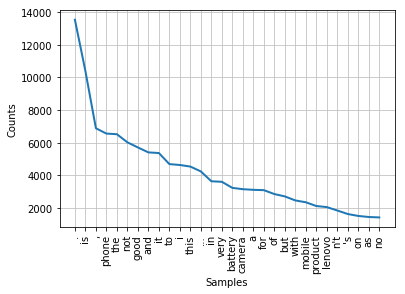

In [28]:
fdist.plot(30,cumulative=False)
plt.show()

In [29]:
from string import punctuation
from nltk.corpus import stopwords

In [30]:
stop_nltk = stopwords.words("english")

In [31]:
stop_updated = stop_nltk + list(punctuation) + ["..."] + ["phone", "mobile"]

below code removes:
1. stopwords, 
2. punct's,
3. custom stop words,
4. words with lenght less than 2

In [32]:
reviews_updated1 = [word for word in all_terms if word not in stop_updated and len(word) > 2]

In [33]:
print(reviews_updated1[:20])

['good', 'need', 'updates', 'improvements', 'worst', 'bought', 'ever', 'battery', 'draining', 'like', 'hell', 'backup', 'hours', 'internet', 'uses', 'even', 'put', 'idle', 'getting', 'discharged.this']


In [34]:
len(set(reviews_updated1))

18478

In [35]:
from nltk.stem import SnowballStemmer
stemmer_s = SnowballStemmer("english")

In [36]:
reviews_updated_stem = [ stemmer_s.stem(word) for word in reviews_updated1]

In [37]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

In [38]:
reviews_updated_lemm = [ lemm.lemmatize(word) for word in reviews_updated1]

In [39]:
print(len(set(reviews_updated_stem)),len(set(reviews_updated_lemm)))

16162 17904


In [ ]:
#Stememr reduces the number of distinct words in the corpus to a greater exten

In [40]:
#lets build a udf which takes a text as input and does all the above cleaning steps
# one review at a time will be passed from the the reviews column to this function
#based on the outcome of this function, you should be able to add a new column in the data frame
def  clean_txt(sent):
    tokens = word_tokenize(sent.lower())
    stemmed = [stemmer_s.stem(term) for term in tokens 
               if term not in stop_updated and len(term) > 2] 
    res = " ".join(stemmed)
    return res

In [41]:
reviews['clean_review'] = reviews.review.apply(clean_txt)

In [42]:
reviews.head()

,sentiment,review,clean_review
0,1,Good but need updates and improvements,good need updat improv
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..
3,1,Good,good
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still amazon...


on the cleaned reviews,Plot 
1. word cloud
2. bar chart of top 25 words

In [43]:
reviews_combined = " ".join(reviews.clean_review.values)

In [44]:
word_cloud = WordCloud(width=800,height=800,background_color='white',max_words=150).\
generate_from_text(reviews_combined)

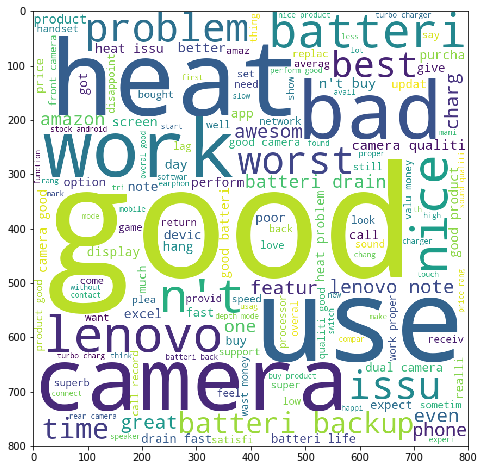

In [45]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

In [46]:
all_terms = []
fdist = {}
all_terms = reviews_combined.split(" ")
for word in all_terms:
    fdist[word] = fdist.get(word,0) + 1

In [47]:
freq = {"words":list(fdist.keys()),"freq":list(fdist.values())}
df_dist = pd.DataFrame(freq)

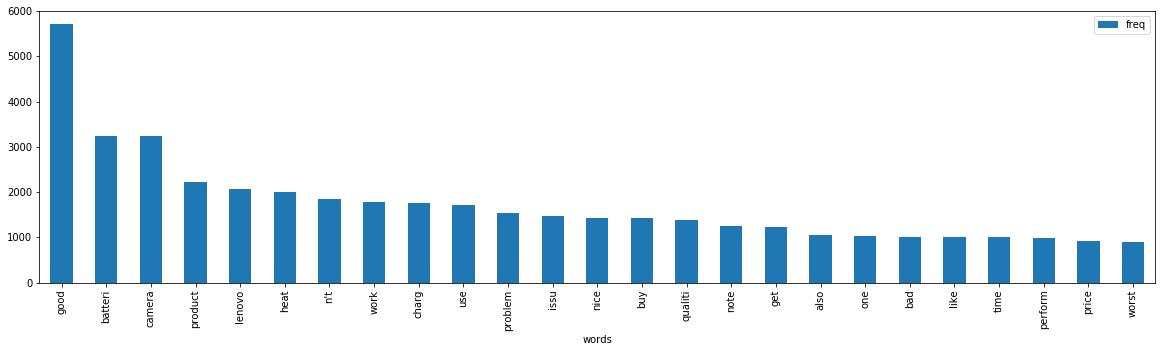

In [48]:
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5)) 